In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('cleaned_data.csv',index_col=0)
df.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


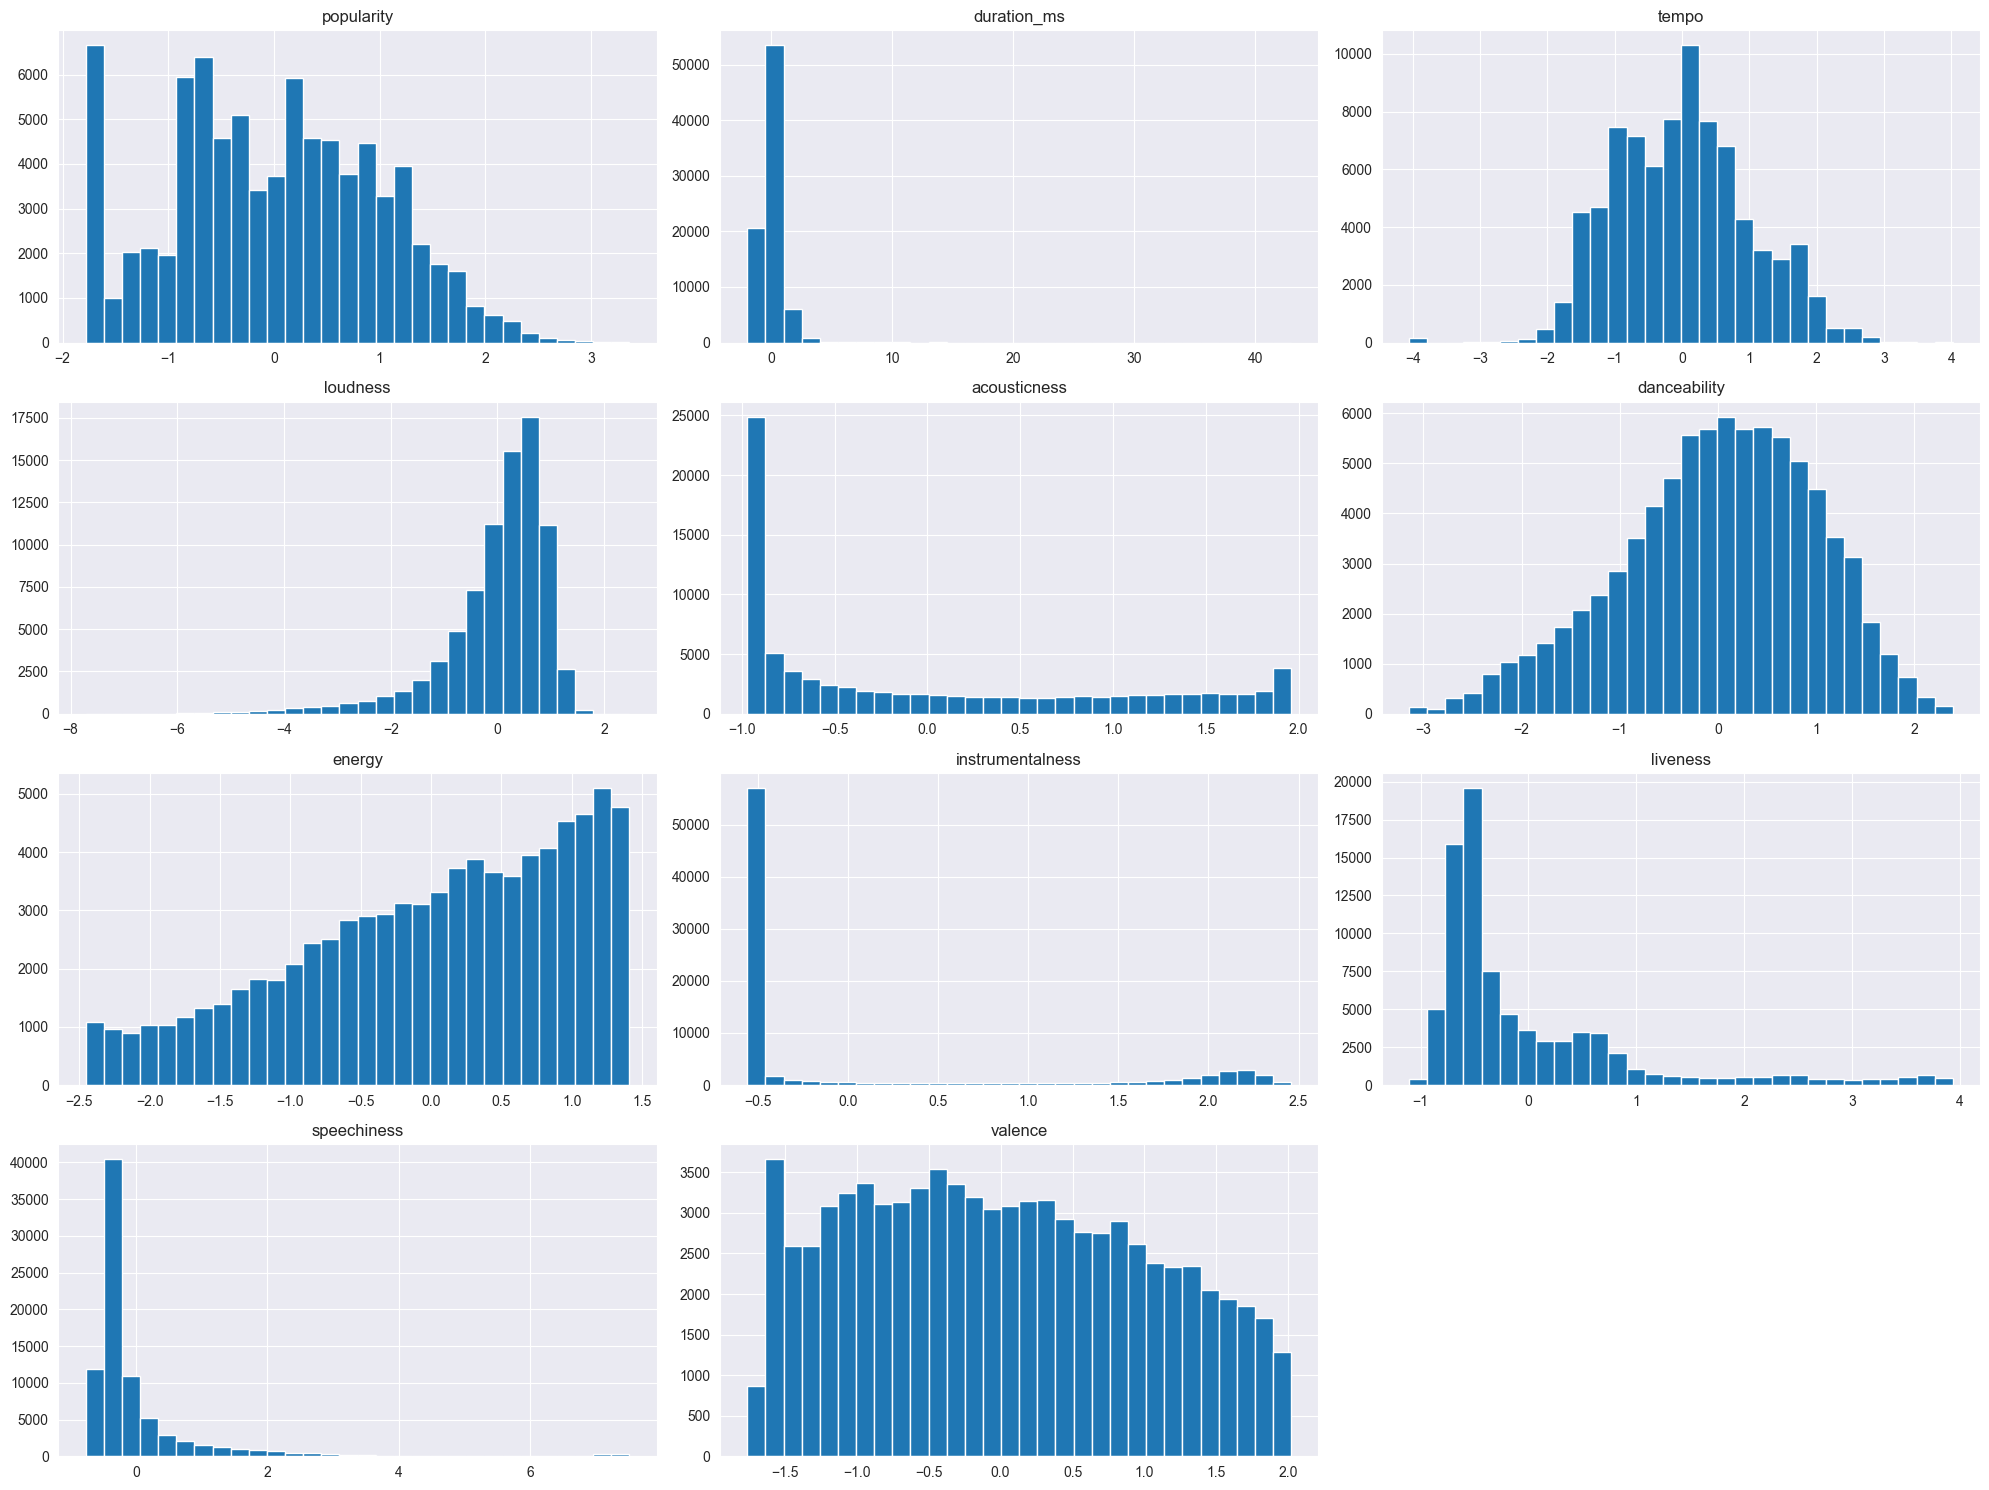

In [4]:

features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

# Normalize selected attributes using z-score normalization
scaler = StandardScaler()
df[features_to_plot] = scaler.fit_transform(df[features_to_plot])

sns.set_style('darkgrid')
df[features_to_plot].hist(figsize = (20,15), bins = 30)
plt.tight_layout()
plt.show()

- danceability and tempo have nearly normal distributions
- loudness, acousticness, speechiness, liveliness are skewed, with loudness being left-skewed and the rest being right-skewed
- for popularity, if the songs with the value 0 are taken out, the distribution would almost be normal
- energy has an increasing distribution

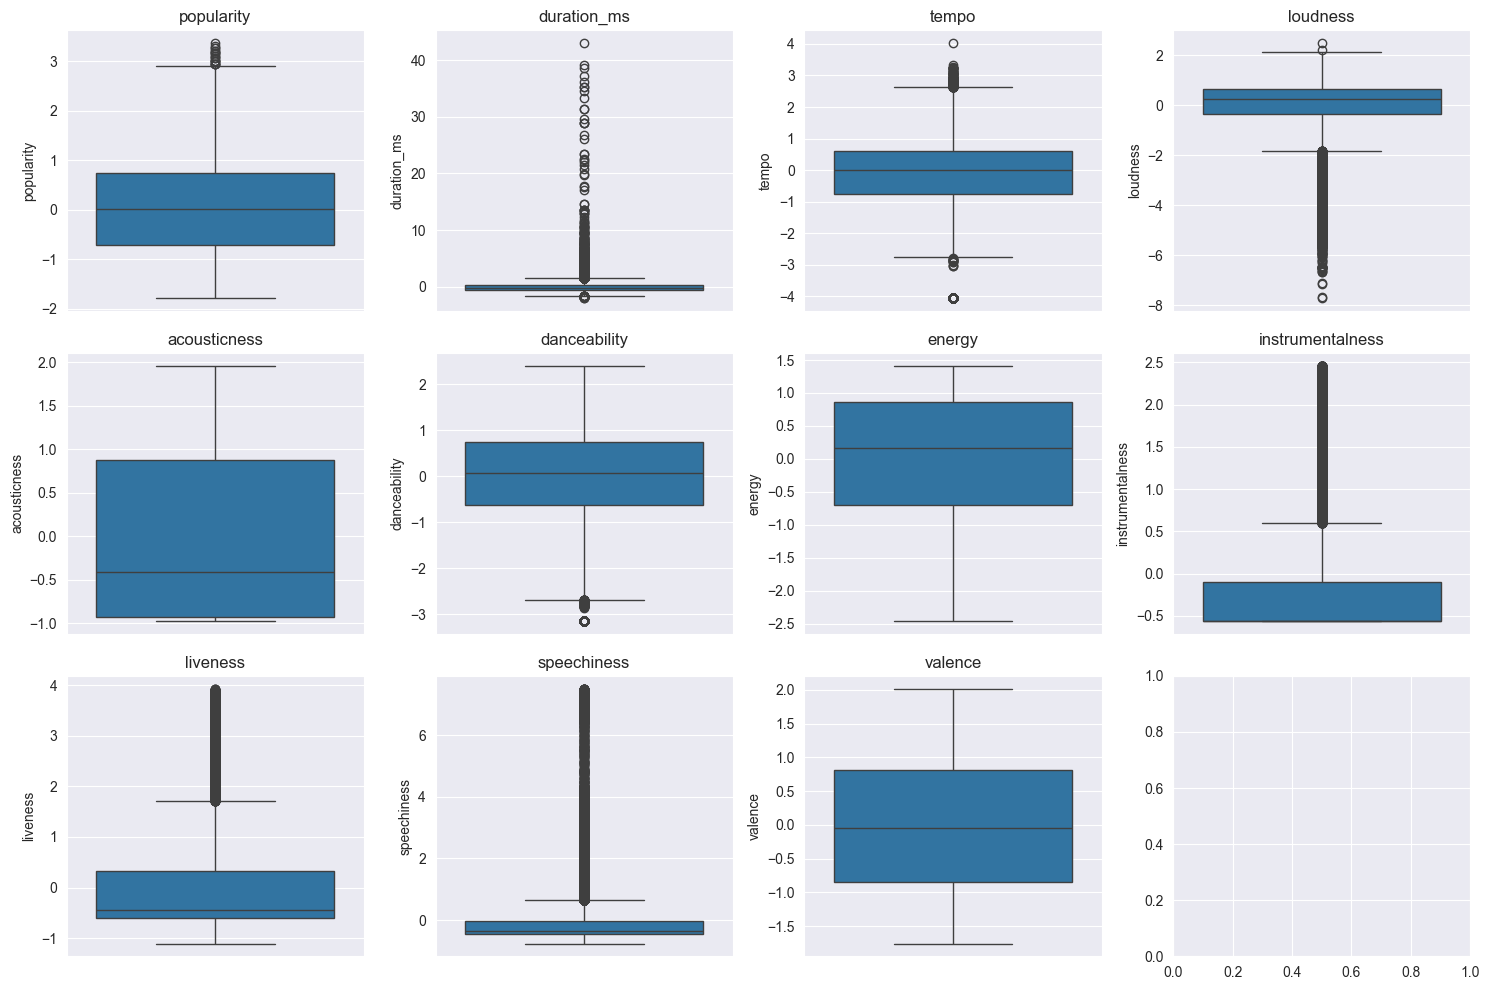

In [5]:
# boxplot for numerical columns
features_to_plot = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
for i, col in enumerate(features_to_plot):
    sns.boxplot(y=col, data=df, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

- acousticness, energy and valence have no outliers
- all of the other features have many outliers which makes sense since they are features that describe a song and are thus useful and should be kept to keep the diversity of the songs in the dataset 

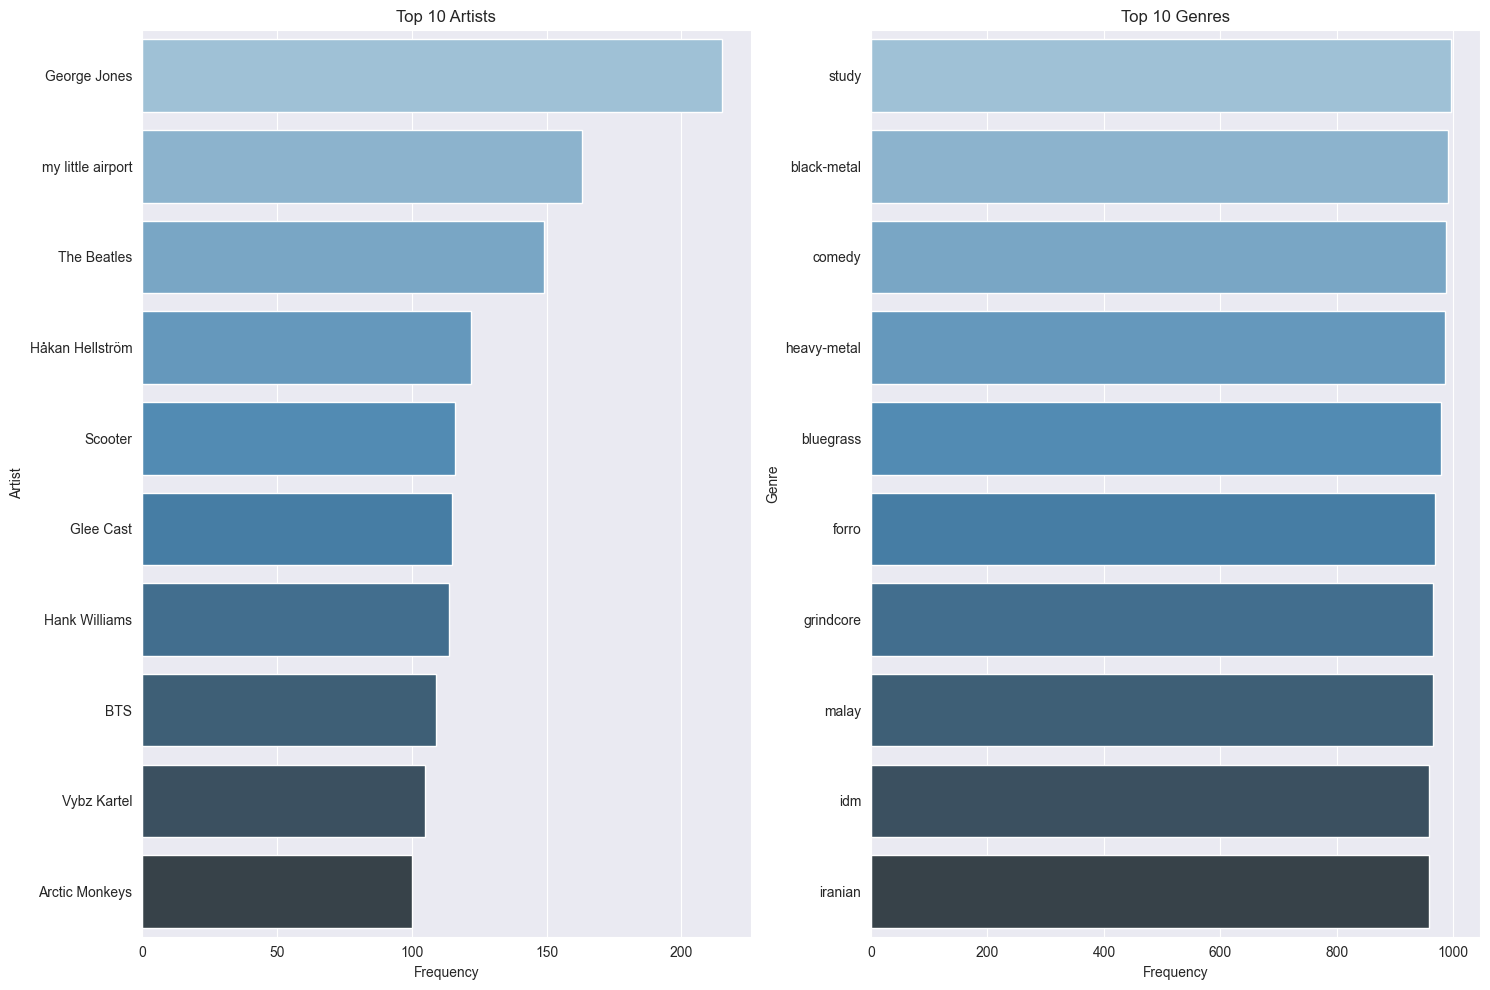

In [6]:
top = 10
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top)
top_genres = df['track_genre'].value_counts().head(top)

# Plotting
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

# Top N Artists
sns.barplot(x = top_artists.values, y = top_artists.index, hue = top_artists.index, palette="Blues_d", ax=axes[0], legend = False)
axes[0].set_title(f'Top 10 Artists')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Artist')

# Top N Genres
sns.barplot(x = top_genres.values, y = top_genres.index, hue = top_genres.index, palette = "Blues_d", ax = axes[1], legend = False)
axes[1].set_title(f'Top 10 Genres')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()



- most of the artists in the top 10 are known around the world such as George Jones, The Beatles, Hank Williams, BTS, and Arctic Monkeys
- the top 10 genres are slightly surprising since only a few are considered mainstream popular genres
    - study songs in this dataset consist of lo-fi songs 
    - comedy songs in this dataset consist of songs that are not meant to be taken seriously or be known for their musicality
    - black-metal, heavy-metal and grindcore are all subgenres or related to metal music
    - forro is a genre of dance music from northeastern Brazil
    - Malay and Iranian are all music from specific countries
    - IDM is a subgenre of EDM
    - bluegrass is a genre that is derived from country, blues and jazz

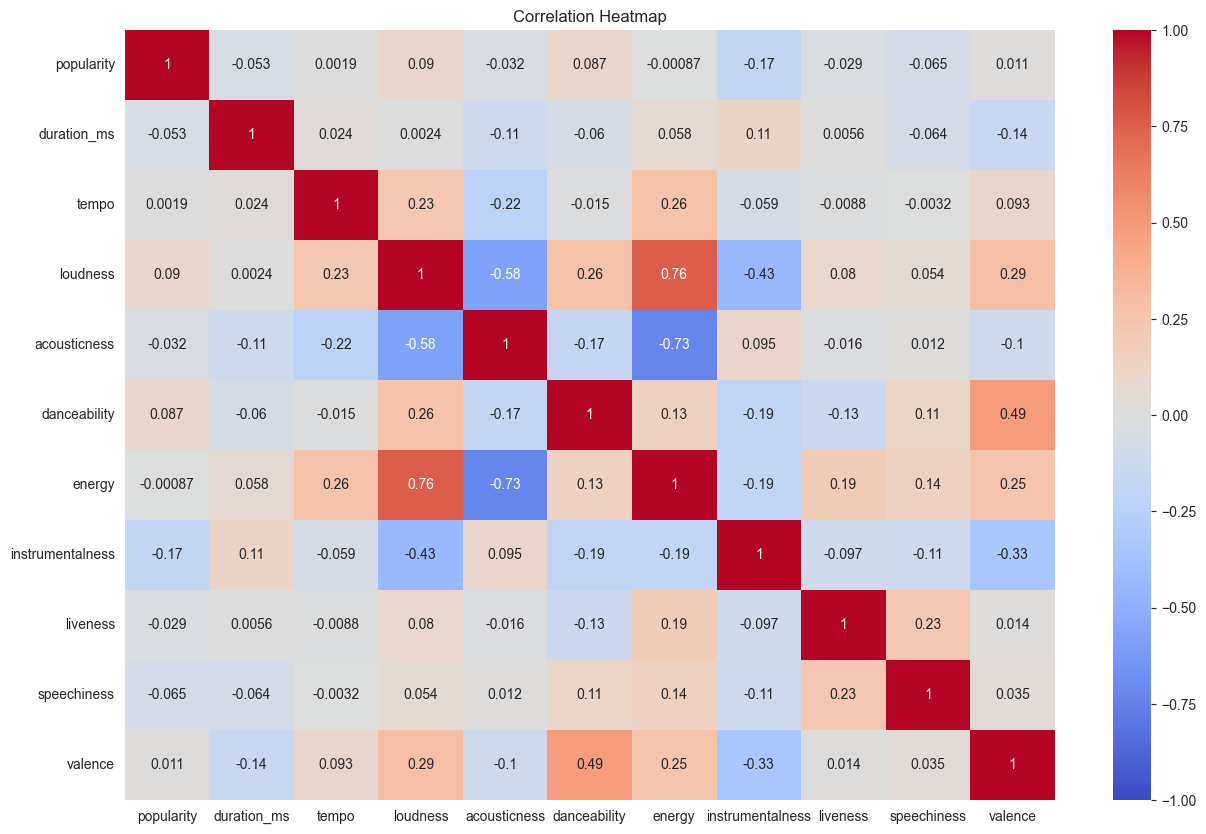

In [7]:
# heatmap for correlation
corr = df[features_to_plot].corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- there is a significant positive correlation between energy and loudness
- there are significant negative correlations between acousticness and loudness, and energy and acousticness
- there is a slight positive correlation between valence and danceability
- there is a slight negative correlation between isntrumentalness and loudness